In [20]:
import pandas as pd

data_predict = pd.read_csv("result/predict.csv")
data_actual  = pd.read_csv("result/actual.csv")
# data_actual_new = data_actual[['time','close']]
data_actual = data_actual.loc[:, ~data_actual.columns.str.contains('^Unnamed')]


In [21]:
data_predict

,time,predict
0,2022-06-30 21:55:00,1.048002
1,2022-06-30 22:00:00,1.048007
2,2022-06-30 22:05:00,1.047812
3,2022-06-30 22:10:00,1.047207
4,2022-06-30 22:15:00,1.047390
...,...,...
229,2022-07-01 17:05:00,1.037278
230,2022-07-01 17:10:00,1.036558
231,2022-07-01 17:15:00,1.038709
232,2022-07-01 17:20:00,1.037210


In [22]:
data_actual

,time,close
0,2022-06-28 10:10:00,1.05898
1,2022-06-28 10:15:00,1.05915
2,2022-06-28 10:20:00,1.05871
3,2022-06-28 10:25:00,1.05886
4,2022-06-28 10:30:00,1.05906
...,...,...
996,2022-07-01 21:25:00,1.04215
997,2022-07-01 21:30:00,1.04254
998,2022-07-01 21:35:00,1.04257
999,2022-07-01 21:40:00,1.04281


In [23]:
combine_data = pd.merge(data_actual,data_predict, on='time')
combine_data['time'] = pd.to_datetime(combine_data['time'])

In [24]:
combine_data

,time,close,predict
0,2022-06-30 21:55:00,1.04805,1.048002
1,2022-06-30 22:00:00,1.04769,1.048007
2,2022-06-30 22:05:00,1.04753,1.047812
3,2022-06-30 22:10:00,1.04750,1.047207
4,2022-06-30 22:15:00,1.04681,1.047390
...,...,...,...
228,2022-07-01 17:05:00,1.03832,1.037278
229,2022-07-01 17:10:00,1.03772,1.036558
230,2022-07-01 17:15:00,1.03809,1.038709
231,2022-07-01 17:20:00,1.03792,1.037210


In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [26]:
rmse = sqrt(mean_squared_error(combine_data['close'],combine_data['predict']))
mape = mape(combine_data['close'],combine_data['predict'])

print(rmse)
print(mape)

0.0005037537083432031
0.035090267621147114


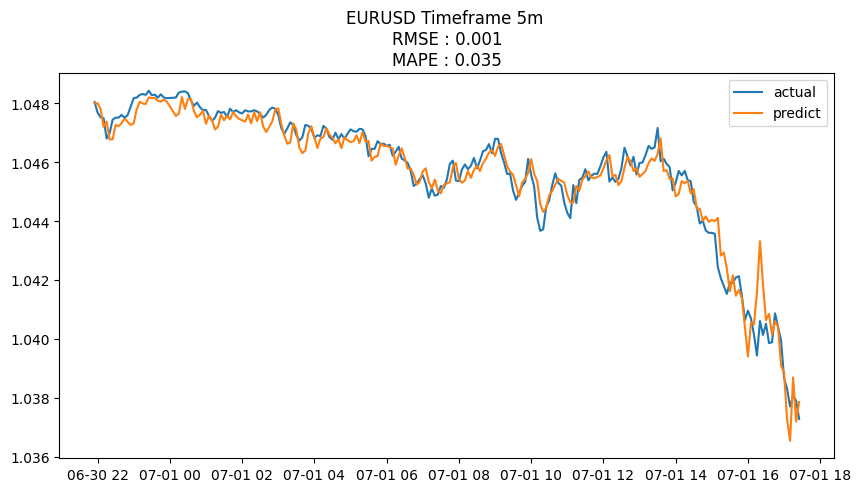

In [27]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
# plt.figure()
plt.title("EURUSD Timeframe 5m \nRMSE : %.3f\nMAPE : %.3f" %(rmse ,mape))
plt.plot(combine_data['time'],combine_data['close'],label = 'actual')
plt.plot(combine_data['time'],combine_data['predict'],label = 'predict')
plt.legend()